## This script provides the numerical experiments to "Exponential Stability of nonlinear, time-dependent Consensus Dynamics for Optimization"

### Comparison of the consensus formation of all versions of CBO

In [230]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from matplotlib.legend_handler import HandlerTuple
import os
import numpy as np
import warnings

In [231]:
import torch
from test_functions import *  # import all test functions
from visualizations import *  # import all illustration functions
import CBO  # import CBO function
from torch.distributions import Uniform, Normal  # import initial distibution function
from IPython.display import Image

## Convergence to consensus for different objectives

Fixed parameters

In [232]:
dimensionality = 2  # dimension of the problem
n_particles = 100  # number of agents
dt = 0.05  # step size of discretization
l = 1  # lambda (drift paramter)
sigma = 0
alpha = 100  # alpha (consensus weight)
n_particles_batches = 1  # batch size of each batch
epochs = 100  # number of iteration od SDE solution scheme (M)
batch_size = None
time_horizon = None
initial_distribution = Uniform(-5,5)  # initial distribution function
SDE_method = 'Euler_Maruyama'  # SDE solution scheme
anisotropic = True  # anisotropic CBO
time = np.linspace(0, dt * epochs, epochs + 1)  # time horizon discretized

Rastrigin function

In [233]:
objective = rastrigin_c(10)  # test function to optimize

minimizer, trajectory = CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    )

In [38]:
# generate gif of CBO particle evolution and extract snapshots of specific timestamps
visualize_trajectory_2d(trajectory, objective, dt, x_range=(-6.5, 6.5), y_range=(-6.5,6.5), elev_deg=90, azim_deg=90, screenshot_times=[0.0, 0.75, 2.0, 4.95], 
                        output_path = 'images/rastrigin.gif', screenshot_dir = 'images/rastrigin_screenshots', 
                        summary_title='Particle evolution on Rastrigin function')

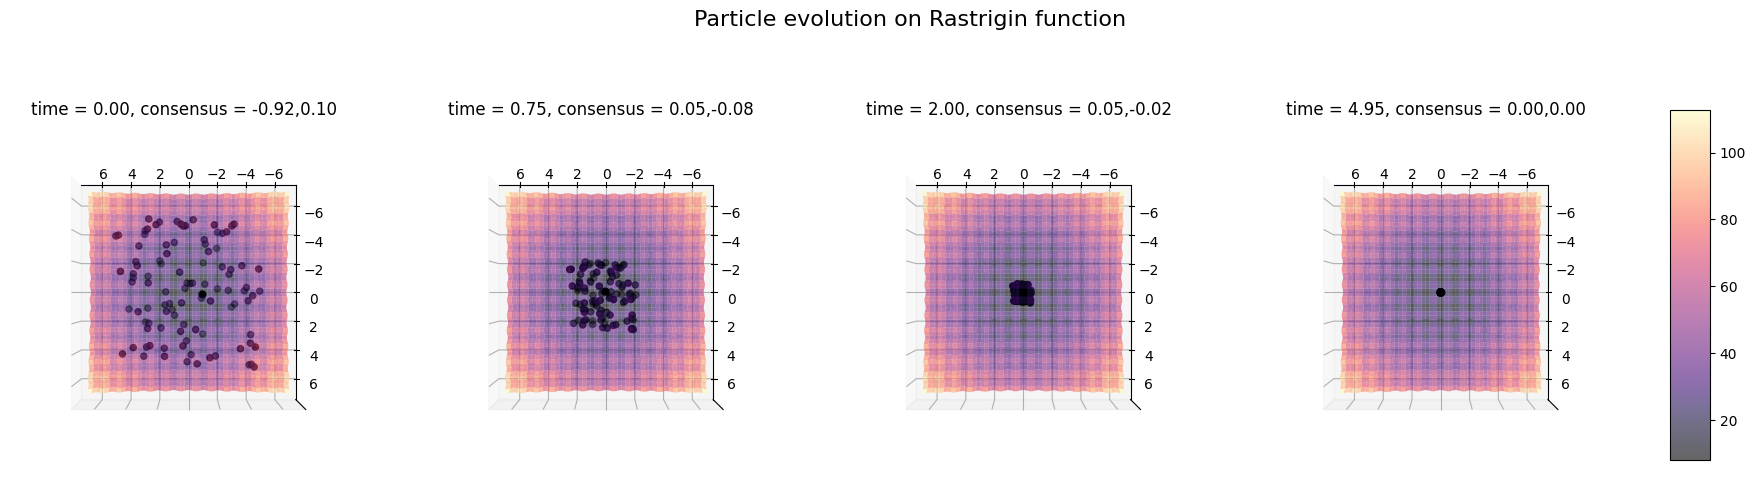

In [39]:
Image(filename='images/rastrigin_screenshots_row.png', width = 1200) # display gif

In [234]:
# computation evolution of the norm of the projected particle system 
norm_projected_particles_rastrigin = []

for trajectory_point in trajectory:
    V = trajectory_point['V']
    # calculate norm of projected particles
    V_centered = V - V.mean(axis=0)  # substract dimensionwise mean of each particle
    norm_projected_particles_rastrigin.append(torch.sum(V_centered ** 2))  # sum squared entries

# computation of ecxponential convergence bound
convergence_bound_rastrigin = norm_projected_particles_rastrigin[0] * np.exp(- 2 * l * time)

Mishras Bird function

In [235]:
objective = mishras_bird

minimizer, trajectory = CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    )

In [42]:
# generate gif of CBO particle evolution and extract snapshots of specific timestamps
visualize_trajectory_2d(trajectory, objective, dt, x_range=(-6.5, 6.5), y_range=(-6.5,6.5), elev_deg=90, azim_deg=90, screenshot_times=[0.0, 0.75, 2.0, 4.95], 
                        output_path = 'images/mishra.gif', screenshot_dir = 'images/mishra_screenshots', 
                        summary_title='Particle evolution on Mishra\'s Bird function')

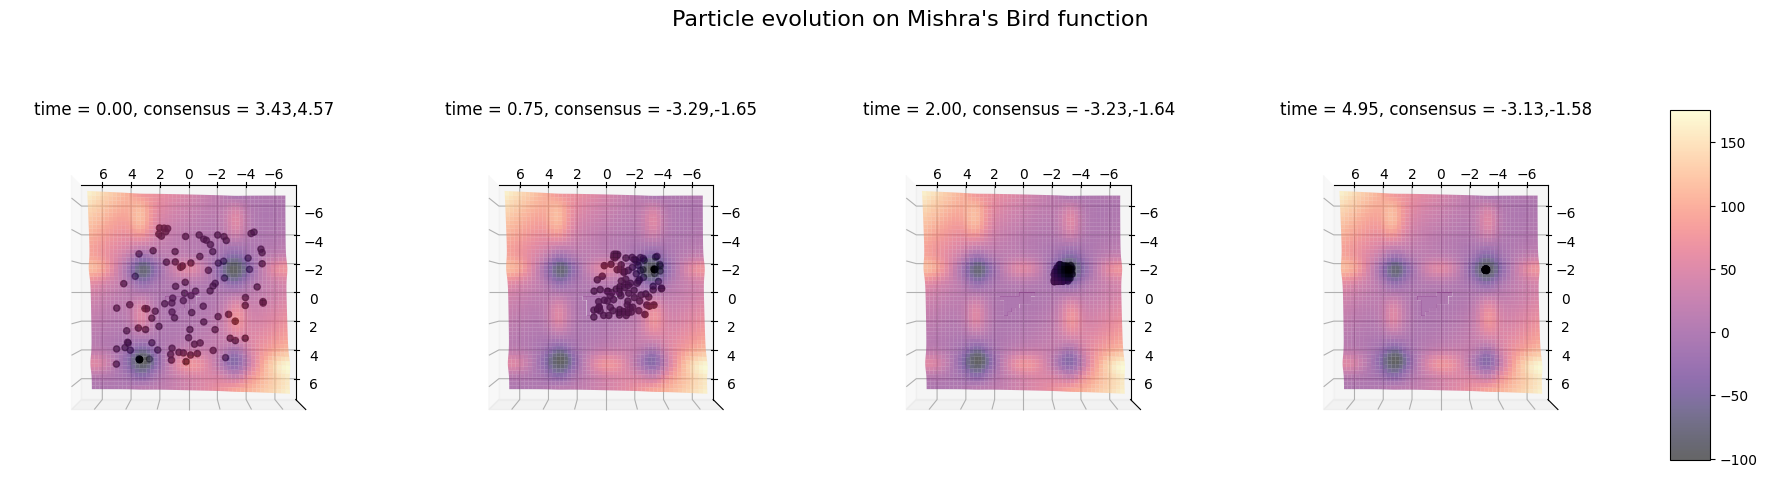

In [43]:
Image(filename='images/mishra_screenshots_row.png', width = 1200) # display gif

In [236]:
# computation evolution of the norm of the projected particle system 
norm_projected_particles_mishra = []

for trajectory_point in trajectory:
    V = trajectory_point['V']
    # calculate norm of projected particles
    V_centered = V - V.mean(axis=0)  # substract dimensionwise mean of each particle
    norm_projected_particles_mishra.append(torch.sum(V_centered ** 2))  # sum squared entries

# computation of ecxponential convergence bound
convergence_bound_mishra = norm_projected_particles_mishra[0] * np.exp(- 2 * l * time)

Rosenbrock function

In [237]:
objective = rosenbrock  # test function to optimize

minimizer, trajectory = CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    )

In [46]:
# generate gif of CBO particle evolution and extract snapshots of specific timestamps
visualize_trajectory_2d(trajectory, objective, dt, x_range=(-6.5, 6.5), y_range=(-6.5,6.5), elev_deg=90, azim_deg=90, screenshot_times=[0.0, 0.75, 2.0, 4.95], 
                        output_path = 'images/rosenbrock.gif', screenshot_dir = 'images/rosenbrock_screenshots', 
                        summary_title='Particle evolution on Rosenbrock function')

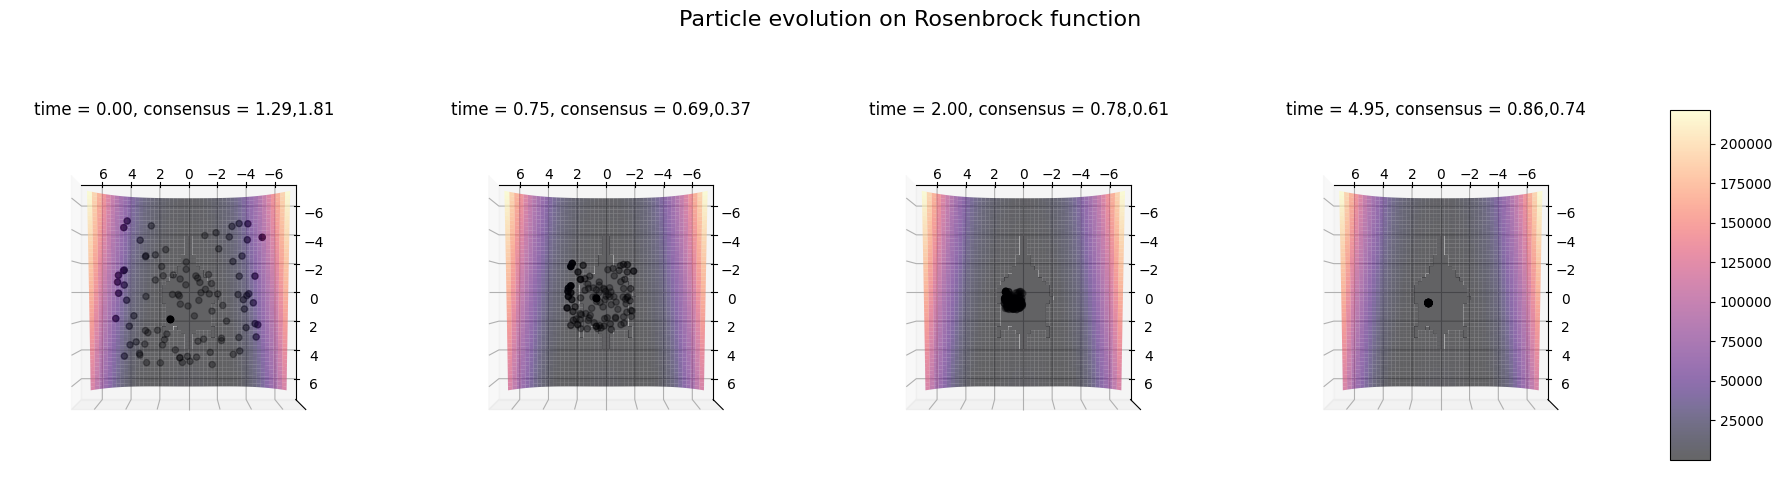

In [47]:
Image(filename='images/rosenbrock_screenshots_row.png', width = 1200) # display gif

Comparison Convergence to Consensus

In [238]:
# computation evolution of the norm of the projected particle system 
norm_projected_particles_rosenbrock = []

for trajectory_point in trajectory:
    V = trajectory_point['V']
    # calculate norm of projected particles
    V_centered = V - V.mean(axis=0)  # substract dimensionwise mean of each particle
    norm_projected_particles_rosenbrock.append(torch.sum(V_centered ** 2))  # sum squared entries

# computation of ecxponential convergence bound
convergence_bound_rosenbrock = norm_projected_particles_rosenbrock[0] * np.exp(- 2 * l * time)

In [239]:
### Comparison of the evolution of the norm of the projected particle system 
plt.figure(figsize=(6, 4.5))

plt.plot(time, norm_projected_particles_rastrigin, label=r'Rastrigin', color='blue') 
plt.plot(time, convergence_bound_rastrigin, color='blue', linestyle='--', alpha=0.4)
plt.plot(time, norm_projected_particles_mishra, label='Mishras Bird', color='green') 
plt.plot(time, convergence_bound_mishra, color='green', linestyle='--', alpha=0.4) 
plt.plot(time, norm_projected_particles_rosenbrock, label=r'Rosenbrock', color='red') 
plt.plot(time, convergence_bound_rosenbrock, color='purple', linestyle='--', alpha=0.4) 
plt.xlabel('time')
plt.ylabel(r'$\|r_t\|^2$')
plt.title(r'Evolution of $\|r_t\|^2$ over Time')

# proper legend
dashed_blue = Line2D([0], [0], color='blue', linestyle='--', alpha=0.4)
dashed_green = Line2D([0], [0], color='green', linestyle='--', alpha=0.4)
dashed_purple = Line2D([0], [0], color='red', linestyle='--', alpha=0.4)
blue_line = Line2D([0], [0], color='blue', linewidth=2)
green_line = Line2D([0], [0], color='green', linewidth=2)
purple_line = Line2D([0], [0], color='red', linewidth=2)
handles = [
    blue_line,
    green_line,
    purple_line,
    (dashed_blue, dashed_green, dashed_purple) 
]
labels = [
    r'Rastrigin',
    'Mishra\'s Bird',
    r'Rosenbrock',
    r'$e^{-2\lambda t} \|r_0^n\|$'
]
plt.legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=None)})

# Speichern
output_path = os.path.join('images/', 'norm_projected_particles_evolution_varying_objective.png')
plt.savefig(output_path, format='png')
plt.close()


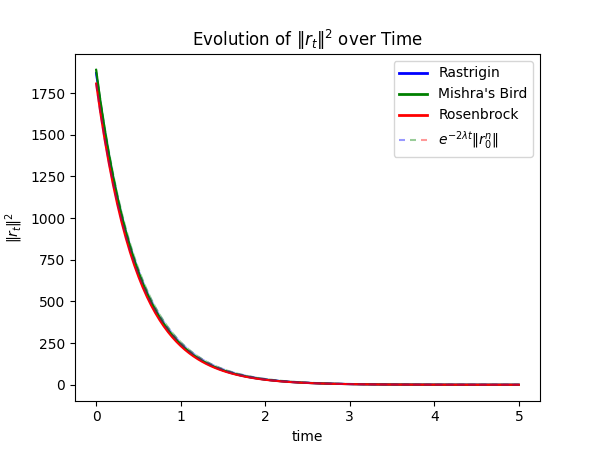

In [240]:
Image(filename='images/norm_projected_particles_evolution_varying_objective.png', width = 500)

## Sensitivity analysis of convergence to consensus

Fixed parameters

In [241]:
objective = rastrigin_c(10)
dimensionality = 2  # dimension of the problem
n_particles = 100  # number of agents
dt = 0.05  # step size of discretization
l = 1  # lambda (drift paramter)
sigma = 0
alpha = 100  # alpha (consensus weight)
n_particles_batches = 1  # batch size of each batch
epochs = 100  # number of iteration od SDE solution scheme (M)
batch_size = None
time_horizon = None
initial_distribution = Uniform(-5,5)  # initial distribution function
SDE_method = 'Euler_Maruyama'  # SDE solution scheme
anisotropic = True  # anisotropic CBO
time = np.linspace(0, dt * epochs, epochs + 1)  # time horizon discretized

Simulation of convergence for all combinations

In [242]:
# list of parameter values
alpha_list = list(range(1, 1001))
n_particles_list = list(range(10, 1001))
dimensionality_list = list(range(1, 201))

# fixed values, when paramter is not varied
fixed_alpha = 100
fixed_n_particles = 100
fixed_dimensionality = 2

# Store each evolution in dictionary
results_alpha = {}          # key = alpha
results_n_particles = {}    # key = N
results_dimensionality = {} # key = D

# evaluation function for each combination
def run_cbo_and_compute_norm(alpha, n_particles, dimensionality, dt, epochs):
    minimizer, trajectory = CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution,dt, l, sigma, alpha, 
        anisotropic, SDE_method, batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False,use_additional_random_shift=False,use_additional_gradients_shift=False,
        random_shift_epsilon=None,gradients_shift_gamma=None,best_particle_alpha=1e5,
        use_gpu_if_available=False,return_trajectory=True,cooling=False
    )

    norm_projected_particles = []

    for trajectory_point in trajectory:
        V = trajectory_point['V']
        V_centered = V - V.mean(axis=0)
        norm_projected_particles.append(torch.sum(V_centered ** 2).item())

    return np.array(norm_projected_particles)


# Sensitivity for varying alpha
for alpha in alpha_list:
    results_alpha[alpha] = run_cbo_and_compute_norm(
        alpha=alpha, n_particles=fixed_n_particles, dimensionality=fixed_dimensionality, dt=dt, epochs=epochs
    )

# Sensitivity for varying N
for N in n_particles_list:
    results_n_particles[N] = run_cbo_and_compute_norm(
        alpha=fixed_alpha, n_particles=N, dimensionality=fixed_dimensionality, dt=dt, epochs=epochs
    )

# Sensitivity for varying dimensionality
for D in dimensionality_list:
    results_dimensionality[D] = run_cbo_and_compute_norm(
        alpha=fixed_alpha, n_particles=fixed_n_particles, dimensionality=D, dt=dt, epochs=epochs
    )

# Store all results together
Z_alpha = np.vstack([results_alpha[a] for a in alpha_list])
Z_N     = np.vstack([results_n_particles[N] for N in n_particles_list])
Z_dim   = np.vstack([results_dimensionality[D] for D in dimensionality_list])

# common colour scale
all_data = np.concatenate([Z_alpha.flatten(), Z_N.flatten(), Z_dim.flatten()])
vmin = np.min(all_data[all_data > 0])
vmax = np.max(all_data)
norm = colors.LogNorm(vmin=vmin, vmax=vmax)
cmap = plt.cm.plasma

# plot
fig = plt.figure(figsize=(18, 6))
gs = gridspec.GridSpec(1, 3, wspace=0.25)

# --- Alpha ---
ax1 = fig.add_subplot(gs[0, 0], projection='3d')
X, Y = np.meshgrid(time, alpha_list)
ax1.plot_surface(X, Y, Z_alpha, cmap=cmap, norm=norm)
ax1.set_xlabel('time')
ax1.set_ylabel(r'$\alpha$')
ax1.set_zlabel(r'$\|r_t\|^2$')
ax1.set_title(r'Variation of $\alpha$')

# --- N ---
ax2 = fig.add_subplot(gs[0, 1], projection='3d')
X, Y = np.meshgrid(time, n_particles_list)
ax2.plot_surface(X, Y, Z_N, cmap=cmap, norm=norm)
ax2.set_xlabel('time')
ax2.set_ylabel(r'$N$')
ax2.set_title(r'Variation of $N$')

# --- Dimension ---
ax3 = fig.add_subplot(gs[0, 2], projection='3d')
X, Y = np.meshgrid(time, dimensionality_list)
ax3.plot_surface(X, Y, Z_dim, cmap=cmap, norm=norm)
ax3.set_xlabel('time')
ax3.set_ylabel(r'$D$')
ax3.set_title(r'Variation of $D$')

# Colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
fig.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=cbar_ax,
    label=r'$\|r_t\|^2$ (log scale)'
)

plt.tight_layout(rect=[0, 0, 0.9, 1])

# Adjust layout and save figure
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    plt.tight_layout(rect=[0, 0, 0.9, 0.95])

os.makedirs('images', exist_ok=True)
output_path = os.path.join('images/norm_projected_particles_evolution_sensitivity_analysis.png')
fig.savefig(output_path, bbox_inches='tight')
plt.close()

C:\Users\jheieck\AppData\Local\Temp\ipykernel_8648\2365434298.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


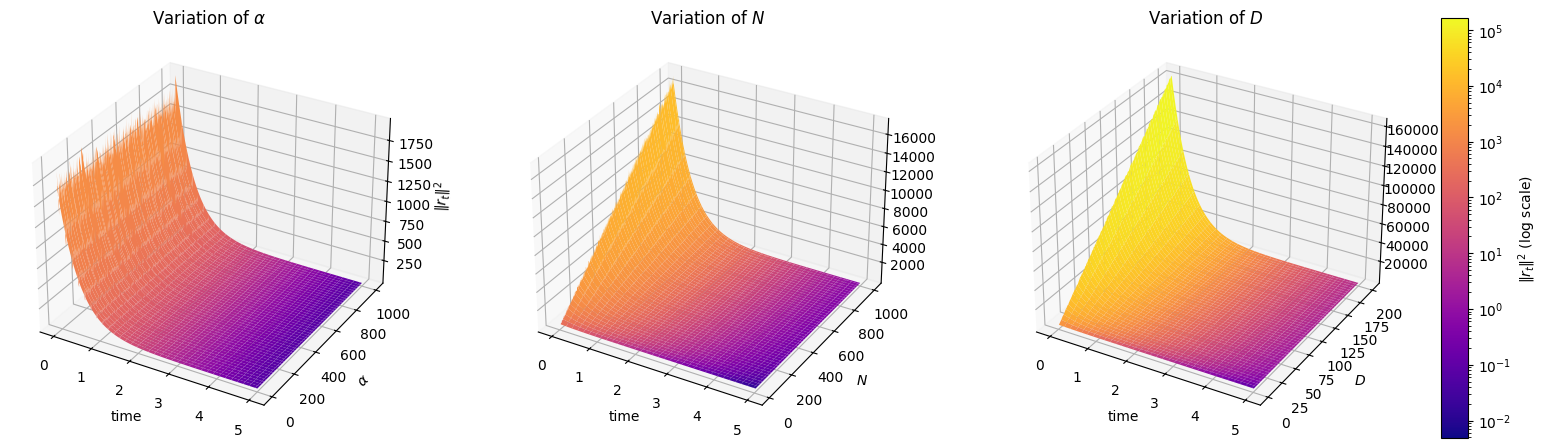

In [243]:
Image(filename=os.path.join('images/norm_projected_particles_evolution_sensitivity_analysis.png'), width = 1000)

Comparison to expected convergence rates

In [244]:
# compute expected convergen bound
def convergence_bound(norm_trajectory, time, l):
    return norm_trajectory[0] * np.exp(-2 * l * time)

# extract the correct values (first, fixed and last)
alpha_values_plot = [alpha_list[0], fixed_alpha, alpha_list[-1]]
N_values_plot     = [n_particles_list[0], fixed_n_particles, n_particles_list[-1]]
D_values_plot     = [dimensionality_list[0], fixed_dimensionality, dimensionality_list[-1]]

# define plot function
def plot_convergence_comparison(
    time, trajectories_dict, param_values, param_name, filename
):
    colors_list = ['blue', 'green', 'red']
    labels_list = [
        f'{param_name} = {param_values[0]}',
        f'{param_name} = {param_values[1]}',
        f'{param_name} = {param_values[2]}'
    ]

    plt.figure(figsize=(6, 4.5))

    solid_lines = []
    dashed_lines = []

    for value, color, label in zip(param_values, colors_list, labels_list):
        traj = trajectories_dict[value]
        bound = convergence_bound(traj, time, l)

        plt.plot(time, traj, color=color, linewidth=2)
        plt.plot(time, bound, color=color, linestyle='--', alpha=0.4)

        solid_lines.append(Line2D([0], [0], color=color, linewidth=2))
        dashed_lines.append(Line2D([0], [0], color=color, linestyle='--', alpha=0.4))

    plt.xlabel('time')
    plt.ylabel(r'$\|r_t\|^2$')
    plt.title(f'Variation of {param_name}')

    handles = solid_lines + [(tuple(dashed_lines))]
    labels = labels_list + [r'$e^{-2\lambda t}\|r_0\|^2$']

    plt.legend(
        handles,
        labels,
        handler_map={tuple: HandlerTuple(ndivide=None)}
    )

    os.makedirs('images', exist_ok=True)
    plt.savefig(os.path.join('images', filename), bbox_inches='tight')
    plt.close()

# create plots
plot_convergence_comparison(
    time=time,
    trajectories_dict=results_alpha,
    param_values=alpha_values_plot,
    param_name=r'$\alpha$',
    filename='convergence_alpha_comparison.png'
)

plot_convergence_comparison(
    time=time,
    trajectories_dict=results_n_particles,
    param_values=N_values_plot,
    param_name=r'$N$',
    filename='convergence_N_comparison.png'
)

plot_convergence_comparison(
    time=time,
    trajectories_dict=results_dimensionality,
    param_values=D_values_plot,
    param_name=r'$D$',
    filename='convergence_dimensionality_comparison.png'
)

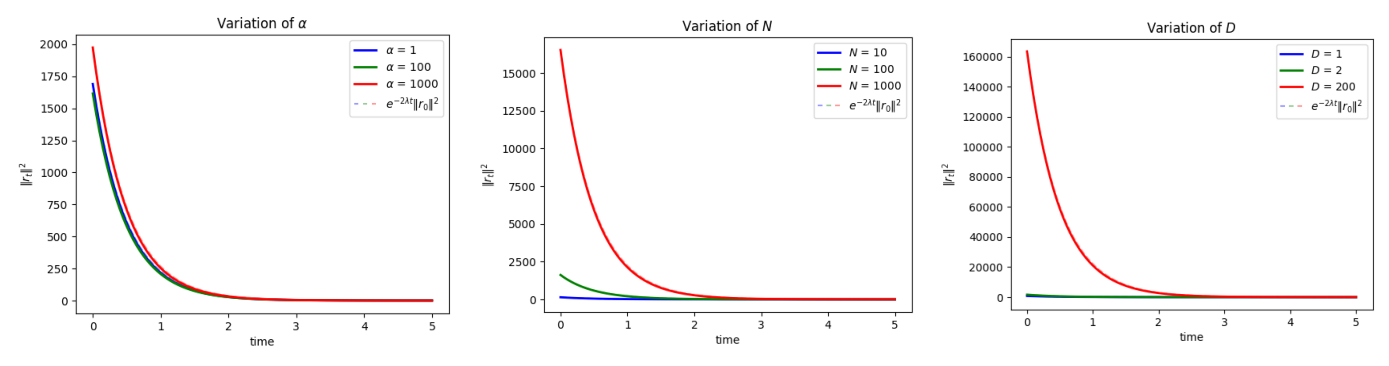

In [245]:
from PIL import Image

files = [
    'images/convergence_alpha_comparison.png',
    'images/convergence_N_comparison.png',
    'images/convergence_dimensionality_comparison.png'
]

fig, axes = plt.subplots(1, 3, figsize=(14, 6))

for ax, file in zip(axes, files):
    img = Image.open(file)
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
fig.savefig('images/norm_projected_particles_evolution_sensitivity_analysis_profile.png', bbox_inches='tight', dpi=150)
plt.show()

### Discretization Analysis

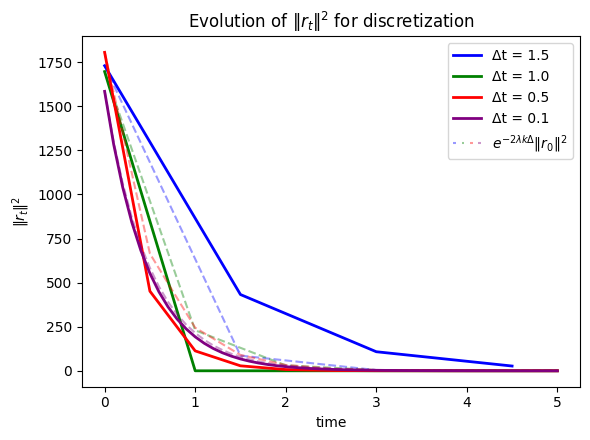

In [246]:
# fix parameters
fixed_alpha = 100
fixed_n_particles = 100
fixed_dimensionality = 2
T_end = 5.0  # end time

dt_values_plot = [1.5, 1.0, 0.5, 0.1]
results_dt = {}
time_arrays = {}

for dt in dt_values_plot:
    # Adjust epochs to consider time horizon until T=5
    epochs = int(np.round(T_end / dt)) 
    dt_key = round(dt, 5)
    
    traj = run_cbo_and_compute_norm(
        alpha=fixed_alpha,
        n_particles=fixed_n_particles,
        dimensionality=fixed_dimensionality,
        dt=dt,
        epochs=epochs
    )
    
    results_dt[dt_key] = traj
    time_arrays[dt_key] = np.arange(len(traj)) * dt  # use suitable time vector

# Plot 
plt.figure(figsize=(6,4.5))
colors_list = ['blue', 'green', 'red', 'purple']
labels_list = [f'Δt = {dt}' for dt in dt_values_plot]

for dt_val, color, label in zip(dt_values_plot, colors_list, labels_list):
    dt_key = round(dt_val, 5)
    traj = results_dt[dt_key]
    time = time_arrays[dt_key]

    bound_squared = traj[0] * np.exp(-2 * l * time)

    plt.plot(time, traj, color=color, linewidth=2)
    plt.plot(time, bound_squared, color=color, linestyle='--', alpha=0.4)

plt.xlabel('time')
plt.ylabel(r'$\|r_t\|^2$')
plt.title(r'Evolution of $\|r_t\|^2$ for discretization')

dashed_lines = [Line2D([0],[0],color=c,linestyle='--',alpha=0.4) for c in colors_list]
solid_lines = [Line2D([0],[0],color=c,linewidth=2) for c in colors_list]
third_line = Line2D([0],[0],color='gray',linestyle='--',alpha=0.4)

handles = solid_lines + [tuple(dashed_lines), third_line]
labels = labels_list + [r'$e^{-2 \lambda k \Delta} \|r_0\|^2$']

plt.legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=None)})

plt.tight_layout()
plt.savefig('images/norm_projected_particles_varying_dt.png', bbox_inches='tight')
plt.show()


## Comparison deterministic consens dynamics vs. CBO

#### Rastrigin

In [220]:
dimensionality = 2  # dimension of the problem
n_particles = 100  # number of agents
dt = 0.05  # step size of discretization
l = 1  # lambda (drift paramter)
sigma = 0
alpha = 100  # alpha (consensus weight)
n_particles_batches = 1  # batch size of each batch
epochs = 100  # number of iteration od SDE solution scheme (M)
batch_size = None
time_horizon = None
initial_distribution = Uniform(-5,5)  # initial distribution function
SDE_method = 'Euler_Maruyama'  # SDE solution scheme
anisotropic = True  # anisotropic CBO
time = np.linspace(0, dt * epochs, epochs + 1)  # time horizon discretized

In [221]:
objective =rastrigin_c(10)

In [222]:
# determinstic run

sigma = 0

minimizer, trajectory = CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    )

rastrigin_projected_particles_determinstic = []

for trajectory_point in trajectory:
    V = trajectory_point['V']
    V_centered = V - V.mean(axis=0)
    rastrigin_projected_particles_determinstic.append(torch.sum(V_centered ** 2))

rastrigin_convergence_bound_determinsitic = rastrigin_projected_particles_determinstic[0] * np.exp(-2 * l * time)

In [223]:
n_mc_samples = 2000  # number of Monte Carlo runs
rastrigin_projected_particles_low_sigma_all = []
rastrigin_projected_particles_high_sigma_all = []


# Stochastic Run
for _ in range(n_mc_samples):
    # ----- condition satisfied -----
    sigma = 1  # sigma (diffusion parameter) with stability condition satisfied
    minimizer, trajectory = CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    )

    norm_projected_particles_low_sigma = []

    for trajectory_point in trajectory:
        V = trajectory_point['V']
        V_centered = V - V.mean(axis=0)
        norm_projected_particles_low_sigma.append(torch.sum(V_centered ** 2))

    rastrigin_projected_particles_low_sigma_all.append(norm_projected_particles_low_sigma)


    # ----- condition unsatisfied -----
    sigma = np.sqrt(1.5)  # sigma (diffusion parameter) with stability condition unsatisfied
    minimizer, trajectory = CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    )

    norm_projected_particles_high_sigma = []

    for trajectory_point in trajectory:
        V = trajectory_point['V']
        V_centered = V - V.mean(axis=0)
        norm_projected_particles_high_sigma.append(torch.sum(V_centered ** 2))

    rastrigin_projected_particles_high_sigma_all.append(norm_projected_particles_high_sigma)


# Monte-Carlo approximation
rastrigin_projected_particles_low_sigma_tensor = torch.tensor(rastrigin_projected_particles_low_sigma_all)
rastrigin_projected_particles_low_sigma = torch.mean(rastrigin_projected_particles_low_sigma_tensor, dim=0).tolist()

rastrigin_convergence_bound_low_sigma = rastrigin_projected_particles_low_sigma[0] * np.exp(-(2 * l - 1) * time)

rastrigin_projected_particles_high_sigma_tensor = torch.tensor(rastrigin_projected_particles_high_sigma_all)
rastrigin_projected_particles_high_sigma = torch.mean(rastrigin_projected_particles_high_sigma_tensor, dim=0).tolist()

rastrigin_convergence_bound_high_sigma = rastrigin_projected_particles_high_sigma[0] * np.exp(-(2 * l - 1.5) * time)

In [224]:
### Comparison of the evolution of the norm of the projected particle system 
from IPython.display import Image

plt.figure(figsize=(6, 4.5))

plt.plot(time, rastrigin_projected_particles_determinstic, label=r'$N = 16$', color='blue') 
plt.plot(time, rastrigin_convergence_bound_determinsitic, color='blue', linestyle='--', alpha=0.4)
plt.plot(time, rastrigin_projected_particles_low_sigma, label=r'$N = 32$', color='green') 
plt.plot(time, rastrigin_convergence_bound_low_sigma, color='green', linestyle='--', alpha=0.4) 
plt.plot(time, rastrigin_projected_particles_high_sigma, label=r'$N = 64$', color='red') 
plt.plot(time, rastrigin_convergence_bound_high_sigma, color='red', linestyle='--', alpha=0.4) 
plt.xlabel('time')
plt.ylabel(r'$\|r_t\|^2$')
plt.title(r'Evolution of $\|r_t\|^2$ over Time for Rastrigin')

# proper legend
dashed_blue = Line2D([0], [0], color='blue', linestyle='--', alpha=0.4)
dashed_green = Line2D([0], [0], color='green', linestyle='--', alpha=0.4)
dashed_red = Line2D([0], [0], color='red', linestyle='--', alpha=0.4)
blue_line = Line2D([0], [0], color='blue', linewidth=2)
green_line = Line2D([0], [0], color='green', linewidth=2)
red_line = Line2D([0], [0], color='red', linewidth=2)
handles = [
    blue_line,
    green_line,
    red_line,
    (dashed_blue, dashed_green, dashed_red) 
]
labels = [
    r'deterministic system',
    r'CBO with $\sigma=1$',
    r'CBO with $\sigma^2=1.5$',
    r'$e^{-\left(2\lambda - \sigma^2\right) t} \|r_0\|^2$'
]
plt.legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=None)})

# Speichern
output_path = os.path.join('images/', 'deterministic_vs_QMC_norm_projected_particles_evolution_rastrigin.png')
plt.savefig(output_path, format='png')
plt.close()


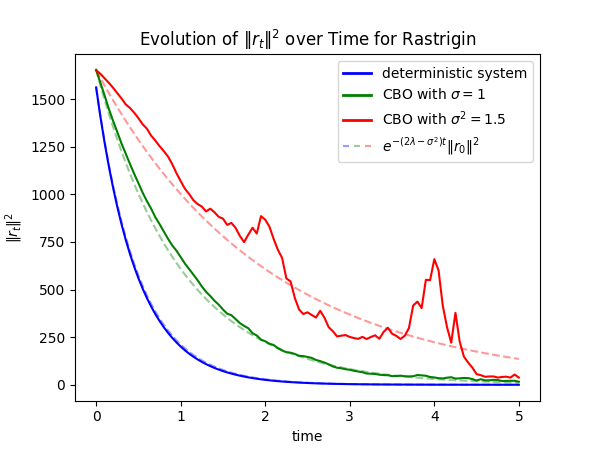

In [225]:
Image(filename='images/deterministic_vs_QMC_norm_projected_particles_evolution_rastrigin.png', width = 600)

#### Mishra

In [250]:
# determinstic run

objective = mishras_bird
sigma = 0

minimizer, trajectory = CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    )

mishra_projected_particles_determinstic = []

for trajectory_point in trajectory:
    V = trajectory_point['V']
    V_centered = V - V.mean(axis=0)
    mishra_projected_particles_determinstic.append(torch.sum(V_centered ** 2))

mishra_convergence_bound_determinsitic = mishra_projected_particles_determinstic[0] * np.exp(-2 * l * time)

In [227]:
n_mc_samples = 2000  # number of Monte Carlo runs
mishra_projected_particles_low_sigma_all = []
mishra_projected_particles_high_sigma_all = []


# Stochastic Run
for _ in range(n_mc_samples):
    # ----- condition satisfied -----
    sigma = 1  # sigma (diffusion parameter) with stability condition satisfied
    minimizer, trajectory = CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    )

    norm_projected_particles_low_sigma = []

    for trajectory_point in trajectory:
        V = trajectory_point['V']
        V_centered = V - V.mean(axis=0)
        norm_projected_particles_low_sigma.append(torch.sum(V_centered ** 2))

    mishra_projected_particles_low_sigma_all.append(norm_projected_particles_low_sigma)


    # ----- condition unsatisfied -----
    sigma = np.sqrt(1.5)  # sigma (diffusion parameter) with stability condition unsatisfied
    minimizer, trajectory = CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    )

    norm_projected_particles_high_sigma = []

    for trajectory_point in trajectory:
        V = trajectory_point['V']
        V_centered = V - V.mean(axis=0)
        norm_projected_particles_high_sigma.append(torch.sum(V_centered ** 2))

    mishra_projected_particles_high_sigma_all.append(norm_projected_particles_high_sigma)


# Monte-Carlo approximation
mishra_projected_particles_low_sigma_tensor = torch.tensor(mishra_projected_particles_low_sigma_all)
mishra_projected_particles_low_sigma = torch.mean(mishra_projected_particles_low_sigma_tensor, dim=0).tolist()

mishra_convergence_bound_low_sigma = mishra_projected_particles_low_sigma[0] * np.exp(-(2 * l - 1) * time)

mishra_projected_particles_high_sigma_tensor = torch.tensor(mishra_projected_particles_high_sigma_all)
mishra_projected_particles_high_sigma = torch.mean(mishra_projected_particles_high_sigma_tensor, dim=0).tolist()

mishra_convergence_bound_high_sigma = mishra_projected_particles_high_sigma[0] * np.exp(-(2 * l - 1.5) * time)

In [228]:
### Comparison of the evolution of the norm of the projected particle system 
plt.figure(figsize=(6, 4.5))

plt.plot(time, mishra_projected_particles_determinstic, label=r'$N = 16$', color='blue') 
plt.plot(time, mishra_convergence_bound_determinsitic, color='blue', linestyle='--', alpha=0.4)
plt.plot(time, mishra_projected_particles_low_sigma, label=r'$N = 32$', color='green') 
plt.plot(time, mishra_convergence_bound_low_sigma, color='green', linestyle='--', alpha=0.4) 
plt.plot(time, mishra_projected_particles_high_sigma, label=r'$N = 64$', color='red') 
plt.plot(time, mishra_convergence_bound_high_sigma, color='red', linestyle='--', alpha=0.4) 
plt.xlabel('time')
plt.ylabel(r'$\|r_t\|^2$')
plt.title(r'Evolution of $\|r_t\|^2$ over Time for Mishras Bird')

# proper legend
dashed_blue = Line2D([0], [0], color='blue', linestyle='--', alpha=0.4)
dashed_green = Line2D([0], [0], color='green', linestyle='--', alpha=0.4)
dashed_red = Line2D([0], [0], color='red', linestyle='--', alpha=0.4)
blue_line = Line2D([0], [0], color='blue', linewidth=2)
green_line = Line2D([0], [0], color='green', linewidth=2)
red_line = Line2D([0], [0], color='red', linewidth=2)
handles = [
    blue_line,
    green_line,
    red_line,
    (dashed_blue, dashed_green, dashed_red) 
]
labels = [
    r'deterministic system',
    r'CBO with $\sigma=1$',
    r'CBO with $\sigma^2=1.5$',
    r'$e^{-\left(2\lambda - \sigma^2\right) t} \|r_0\|^2$'
]
plt.legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=None)})

# Speichern
output_path = os.path.join('images/', 'deterministic_vs_QMC_norm_projected_particles_evolution_mishra.png')
plt.savefig(output_path, format='png')
plt.close()


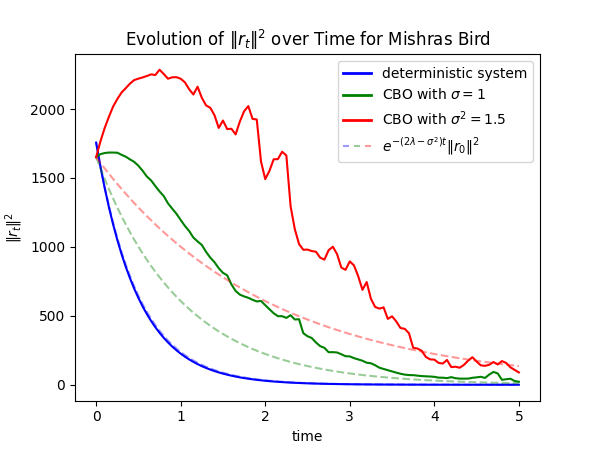

In [229]:
Image(filename='images/deterministic_vs_QMC_norm_projected_particles_evolution_mishra.png', width = 600)

#### Rosenbrock

In [ ]:
# determinstic run

objective = rosenbrock
sigma = 0

minimizer, trajectory = CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    )

rosenbrock_projected_particles_determinstic = []

for trajectory_point in trajectory:
    V = trajectory_point['V']
    V_centered = V - V.mean(axis=0)
    rosenbrock_projected_particles_determinstic.append(torch.sum(V_centered ** 2))

rosenbrock_convergence_bound_determinsitic = rosenbrock_projected_particles_determinstic[0] * np.exp(-2 * l * time)

In [ ]:
n_mc_samples = 2000  # number of Monte Carlo runs
rosenbrock_projected_particles_low_sigma_all = []
rosenbrock_projected_particles_high_sigma_all = []


# Stochastic Run
for _ in range(n_mc_samples):
    # ----- condition satisfied -----
    sigma = 1  # sigma (diffusion parameter) with stability condition satisfied
    minimizer, trajectory = CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    )

    norm_projected_particles_low_sigma = []

    for trajectory_point in trajectory:
        V = trajectory_point['V']
        V_centered = V - V.mean(axis=0)
        norm_projected_particles_low_sigma.append(torch.sum(V_centered ** 2))

    rosenbrock_projected_particles_low_sigma_all.append(norm_projected_particles_low_sigma)


    # ----- condition unsatisfied -----
    sigma = np.sqrt(1.5)  # sigma (diffusion parameter) with stability condition unsatisfied
    minimizer, trajectory = CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    )

    norm_projected_particles_high_sigma = []

    for trajectory_point in trajectory:
        V = trajectory_point['V']
        V_centered = V - V.mean(axis=0)
        norm_projected_particles_high_sigma.append(torch.sum(V_centered ** 2))

    rosenbrock_projected_particles_high_sigma_all.append(norm_projected_particles_high_sigma)


# Monte-Carlo approximation
rosenbrock_projected_particles_low_sigma_tensor = torch.tensor(rosenbrock_projected_particles_low_sigma_all)
rosenbrock_projected_particles_low_sigma = torch.mean(rosenbrock_projected_particles_low_sigma_tensor, dim=0).tolist()

rosenbrock_convergence_bound_low_sigma = rosenbrock_projected_particles_low_sigma[0] * np.exp(-(2 * l - 1) * time)

rosenbrock_projected_particles_high_sigma_tensor = torch.tensor(rosenbrock_projected_particles_high_sigma_all)
rosenbrock_projected_particles_high_sigma = torch.mean(rosenbrock_projected_particles_high_sigma_tensor, dim=0).tolist()

rosenbrock_convergence_bound_high_sigma = rosenbrock_projected_particles_high_sigma[0] * np.exp(-(2 * l - 1.5) * time)

In [ ]:
### Comparison of the evolution of the norm of the projected particle system 
plt.figure(figsize=(6, 4.5))

plt.plot(time, mishra_projected_particles_determinstic, label=r'$N = 16$', color='blue') 
plt.plot(time, mishra_convergence_bound_determinsitic, color='blue', linestyle='--', alpha=0.4)
plt.plot(time, mishra_projected_particles_low_sigma, label=r'$N = 32$', color='green') 
plt.plot(time, mishra_convergence_bound_low_sigma, color='green', linestyle='--', alpha=0.4) 
plt.plot(time, mishra_projected_particles_high_sigma, label=r'$N = 64$', color='red') 
plt.plot(time, mishra_convergence_bound_high_sigma, color='red', linestyle='--', alpha=0.4) 
plt.xlabel('time')
plt.ylabel(r'$\|r_t\|^2$')
plt.title(r'Evolution of $\|r_t\|^2$ over Time for Mishras Bird')

# proper legend
dashed_blue = Line2D([0], [0], color='blue', linestyle='--', alpha=0.4)
dashed_green = Line2D([0], [0], color='green', linestyle='--', alpha=0.4)
dashed_red = Line2D([0], [0], color='red', linestyle='--', alpha=0.4)
blue_line = Line2D([0], [0], color='blue', linewidth=2)
green_line = Line2D([0], [0], color='green', linewidth=2)
red_line = Line2D([0], [0], color='red', linewidth=2)
handles = [
    blue_line,
    green_line,
    red_line,
    (dashed_blue, dashed_green, dashed_red) 
]
labels = [
    r'deterministic system',
    r'CBO with $\sigma=1$',
    r'CBO with $\sigma^2=1.5$',
    r'$e^{-\left(2\lambda - \sigma^2\right) t} \|r_0\|^2$'
]
plt.legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=None)})

# Speichern
output_path = os.path.join('images/', 'deterministic_vs_QMC_norm_projected_particles_evolution_mishra.png')
plt.savefig(output_path, format='png')
plt.close()


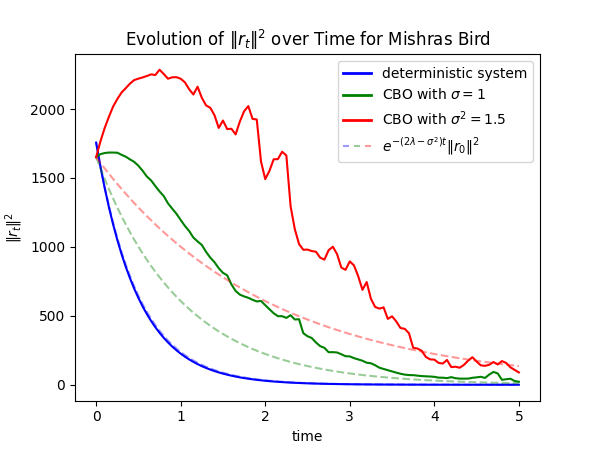

In [ ]:
Image(filename='images/deterministic_vs_QMC_norm_projected_particles_evolution_mishra.png', width = 600)

### Comparison determinstic consensus dynamics vs first-order CBO

In [255]:
import first_order_CBO  # import CBO function

In [259]:
objective = mishras_bird

n_mc_samples = 2000  # number of Monte Carlo runs
first_order_projected_particles_low_sigma_all = []
first_order_projected_particles_high_sigma_all = []


# Stochastic Run
for _ in range(n_mc_samples):
    # ----- condition satisfied -----
    sigma = 1  # sigma (diffusion parameter) with stability condition satisfied
    minimizer, trajectory = first_order_CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    )

    norm_projected_particles_low_sigma = []

    for trajectory_point in trajectory:
        V = trajectory_point['V']
        V_centered = V - V.mean(axis=0)
        norm_projected_particles_low_sigma.append(torch.sum(V_centered ** 2))

    first_order_projected_particles_low_sigma_all.append(norm_projected_particles_low_sigma)


    # ----- condition unsatisfied -----
    sigma = np.sqrt(1.5)  # sigma (diffusion parameter) with stability condition unsatisfied
    minimizer, trajectory = first_order_CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    )

    norm_projected_particles_high_sigma = []

    for trajectory_point in trajectory:
        V = trajectory_point['V']
        V_centered = V - V.mean(axis=0)
        norm_projected_particles_high_sigma.append(torch.sum(V_centered ** 2))

    first_order_projected_particles_high_sigma_all.append(norm_projected_particles_high_sigma)


# Monte-Carlo approximation
first_order_projected_particles_low_sigma_tensor = torch.tensor(first_order_projected_particles_low_sigma_all)
first_order_projected_particles_low_sigma = torch.mean(first_order_projected_particles_low_sigma_tensor, dim=0).tolist()

first_order_convergence_bound_low_sigma = first_order_projected_particles_low_sigma[0] * np.exp(-(2 * l - 1) * time)

first_order_projected_particles_high_sigma_tensor = torch.tensor(first_order_projected_particles_high_sigma_all)
first_order_projected_particles_high_sigma = torch.mean(first_order_projected_particles_high_sigma_tensor, dim=0).tolist()

first_order_convergence_bound_high_sigma = first_order_projected_particles_high_sigma[0] * np.exp(-(2 * l - 1.5) * time)

In [262]:
### Comparison of the evolution of the norm of the projected particle system 
from IPython.display import Image
plt.figure(figsize=(6, 4.5))

plt.plot(time, mishra_projected_particles_determinstic, label=r'$N = 16$', color='blue') 
plt.plot(time, mishra_convergence_bound_determinsitic, color='blue', linestyle='--', alpha=0.4)
plt.plot(time, first_order_projected_particles_low_sigma, label=r'$N = 32$', color='green') 
plt.plot(time, first_order_convergence_bound_low_sigma, color='green', linestyle='--', alpha=0.4) 
plt.plot(time, first_order_projected_particles_high_sigma, label=r'$N = 64$', color='red') 
plt.plot(time, first_order_convergence_bound_high_sigma, color='red', linestyle='--', alpha=0.4) 
plt.xlabel('time')
plt.ylabel(r'$\|r_t\|^2$')
plt.title(r'Evolution of $\|r_t\|^2$ over Time for Mishras Bird')

# proper legend
dashed_blue = Line2D([0], [0], color='blue', linestyle='--', alpha=0.4)
dashed_green = Line2D([0], [0], color='green', linestyle='--', alpha=0.4)
dashed_red = Line2D([0], [0], color='red', linestyle='--', alpha=0.4)
blue_line = Line2D([0], [0], color='blue', linewidth=2)
green_line = Line2D([0], [0], color='green', linewidth=2)
red_line = Line2D([0], [0], color='red', linewidth=2)
handles = [
    blue_line,
    green_line,
    red_line,
    (dashed_blue, dashed_green, dashed_red) 
]
labels = [
    r'deterministic system',
    r'first-order CBO with $\sigma=1$',
    r'first-order CBO with $\sigma^2=1.5$',
    r'$e^{-\left(2\lambda - \sigma^2\right) t} \|r_0\|^2$'
]
plt.legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=None)})

# Speichern
output_path = os.path.join('images/', 'deterministic_vs_first_order_QMC_norm_projected_particles_evolution_mishra.png')
plt.savefig(output_path, format='png')
plt.close()


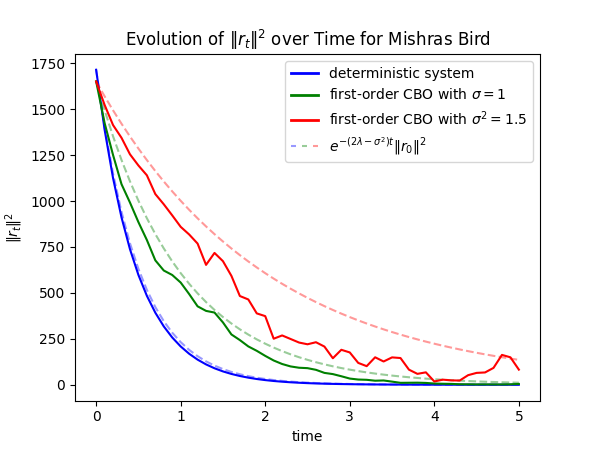

In [263]:
Image(filename='images/deterministic_vs_first_order_QMC_norm_projected_particles_evolution_mishra.png', width = 600)